**Name:** Rahul Kumar

**Student ID:** rxk190002

***

# Results
- Models used with hyperparameters - KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support                                      Vector Machine (rbf, polynomial and sigmoid kernels), Decision Tree classification, Two                                       models with Bagging, Two models with Pasting, Random Forest, Ada Boost (with decision tree,                                     Gradient Boost, Extra-Trees, XGBoost, Voting Classifier to combine results of top 5 models,                                     Voting Classifier to combine results of  models with least correlation, Stacking Classifier                                       to combine results of top 5 models, Stacking Classifier to combine results of models with                                           least correlation



- Best Model parameters - 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8       (XGBoost classifier)
- Mean Cross validation score of Best model - 0.8514285714285714 (XGBoost classifier)
- Test score of best model - 0.8444444444444444 (XGBoost classifier)
- Train score of best model - 0.9126092384519351 (XGBoost classifier)
- Accuracy of best model - 0.8444444444444444 (XGBoost classifier)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [31]:
data = pd.read_csv(r"C:\Users\Rahul\Downloads\titanic.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

PassengerId [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

Survived [0 1] 

Pclass [3 1 2] 

Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima'] 

Sex ['male' 'female'] 

Age [22. 38. 26. 35. nan 54.  2. 27. 14.  4. 58. 20. 39. 55. 31. 34. 15. 28.
  8. 19.] 

SibSp [1 0 3 4 2 5 8] 

Parch [0 1 2 5 3 4 6] 

Ticket ['A/5 21171' 'PC 1

In [35]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and var not in discrete]

# mixed
mixed = ['Cabin']

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' and var not in mixed]

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')
print(f'There are {len(mixed)} mixed variables')

There are 3 discrete variables
There are 3 continuous variables
There are 4 categorical variables
There are 1 mixed variables


In [36]:
# missing values
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [37]:
# cardinality (number of different categories)

data[categorical+mixed].nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
Cabin       147
dtype: int64

In [38]:
# Cabin- mixed variable
# \d regular expression for digts . \d+ one or more digits
data['Cabin_num'] = data['Cabin'].str.extract('(\d+)') # captures numerical part
data['Cabin_num'] = data['Cabin_num'].astype('float')
data['Cabin_cat'] = data['Cabin'].str[0] # captures the first letter

# show dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [39]:
data['Title'] = data['Name'].str.split(',').str[1].str.split('\s+').str[1]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [40]:
data['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Lady.          1
Jonkheer.      1
Mme.           1
Don.           1
the            1
Ms.            1
Sir.           1
Capt.          1
Name: Title, dtype: int64

In [41]:
data['Cabin_cat'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_cat, dtype: int64

In [42]:
# drop original mixed
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [43]:
data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [44]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
0,0,3,male,22.0,1,0,7.2500,S,NaN,NaN,Mr.
1,1,1,female,38.0,1,0,71.2833,C,85.0,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,NaN,NaN,Miss.
3,1,1,female,35.0,1,0,53.1000,S,123.0,C,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,NaN,NaN,Mr.


In [45]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_num
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,200.00000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,50.49000
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,35.39497
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,2.00000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.00000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,43.00000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,77.25000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,148.00000


In [46]:
# separate into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Survived', axis=1),  # predictors
    data['Survived'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((801, 10), (90, 10))

In [47]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
815,1,male,NaN,0,0,0.0000,S,102.0,B,Mr.
877,3,male,19.0,0,0,7.8958,S,NaN,NaN,Mr.
193,2,male,3.0,1,1,26.0000,S,2.0,F,Master.
523,1,female,44.0,0,1,57.9792,C,18.0,B,Mrs.
634,3,female,9.0,3,2,27.9000,S,NaN,NaN,Miss.


In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 815 to 684
Data columns (total 10 columns):
Pclass       801 non-null int64
Sex          801 non-null object
Age          643 non-null float64
SibSp        801 non-null int64
Parch        801 non-null int64
Fare         801 non-null float64
Embarked     799 non-null object
Cabin_num    175 non-null float64
Cabin_cat    179 non-null object
Title        801 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 68.8+ KB


In [49]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [50]:
titanic_pipe = Pipeline([

    # missing data imputation 
    ('imputer_num_arbit',
     mdi.ArbitraryNumberImputer(arbitrary_number=-1,
                                variables=['Cabin_num'])),
    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='mean',variables=['Age'])),
    
    ('imputer_cat_freq',
     mdi.FrequentCategoryImputer(variables=['Embarked'])),
    
    ('imputer_cat_missing',
     mdi.CategoricalVariableImputer(variables=['Cabin_cat','Title'])),

    # categorical encoding 
    ('encoder_rare_label',
     RareLabelCategoricalEncoder(tol=0.01,
                                    n_categories=4,
                                    variables=['Cabin_cat','Title'])),
    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None,
                               variables=['Sex', 'Embarked','Cabin_cat','Title'], # we can select which variables to encode
                               drop_last=True)),

])

In [51]:
titanic_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer_num_arbit',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['Cabin_num'])),
                ('imputer_num_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Age'])),
                ('imputer_cat_freq',
                 FrequentCategoryImputer(variables=['Embarked'])),
                ('imputer_cat_missing',
                 CategoricalVariableImputer(variables=['Cabin_cat', 'Title'])),
                ('encoder_rare_label',
                 RareLabelCategoricalEncoder(n_categories=4, tol=0.01,
                                             variables=['Cabin_cat', 'Title'])),
                ('categorical_encoder',
                 OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                                          variables=['Sex', 'Embarked',
                                                    

In [52]:
# Apply Transformations
X_train=titanic_pipe.transform(X_train)
X_test=titanic_pipe.transform(X_test)

## <span class="mark">DO NOT CHANGE STEPS BEFORE THIS POINT</span>

In [53]:
# Train a logistic regression model, report the coefficients and model performance 

# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


logit = LogisticRegression(max_iter=5000,solver='saga') 


param_grid_logit = { 'penalty' : ['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


CV_logit_class = GridSearchCV(estimator = logit, param_grid = param_grid_logit, cv = 5, verbose = 1, n_jobs = -1, return_train_score = True)
CV_logit_class.fit(X_train, y_train)

y_pred = CV_logit_class.predict(X_test)

best_parameters_logit_class = CV_logit_class.best_params_

print('Logit parameters: ', best_parameters_logit_class)


print("Logistic Train Performance: ", CV_logit_class.score(X_train, y_train))


print("Logistic Test Performance: ", CV_logit_class.score(X_test, y_test))


# Mean Cross validation Score for best model
print("Mean Cross-validation scores for best model: {}". format(CV_logit_class.best_score_))

# Print Co-efficients


print("Logistic.coef_:", CV_logit_class.best_estimator_.coef_)
print("Logistic.intercept_:", CV_logit_class.best_estimator_.intercept_)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   27.3s finished


Logit parameters:  {'C': 0.1, 'penalty': 'l1'}
Logistic Train Performance:  0.8002496878901373
Logistic Test Performance:  0.8
Mean Cross-validation scores for best model: 0.7977872670807453
Logistic.coef_: [[-4.12265817e-02 -7.65126110e-03 -2.24640028e-01 -4.02538358e-04
   1.06156468e-02  8.91508709e-03 -7.26517339e-01  0.00000000e+00
   2.03174658e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -8.89562178e-01  0.00000000e+00  3.66134898e-01  2.82449286e-01]]
Logistic.intercept_: [0.26177131]
Accuracy:  0.8


In [54]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

# YOUR CODE HERE

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(5,25), 'weights': ['distance','uniform'], 'p': [1,2]} 


#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

y_pred = grid_knn.predict(X_test)

print('train score: ', grid_knn.score(X_train, y_train))

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))
print("Accuracy: ", accuracy_score(y_test, y_pred))

train score:  0.9862671660424469
Best Mean Cross-validation score: 0.75

KNN parameters:  {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
KNN Test Performance:  0.8444444444444444
Accuracy:  0.8444444444444444


In [55]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,20), 'min_samples_leaf' : range(1,10)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True)
grid_dtree.fit(X_train, y_train)

y_pred = grid_dtree.predict(X_test)

print('train score: ', grid_dtree.score(X_train, y_train))

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Test Performance: ", grid_dtree.score(X_test,y_test))
print("Accuracy: ", accuracy_score(y_test, y_pred))

train score:  0.8589263420724095
Best Mean Cross-validation score: 0.84

Decision Tree parameters:  {'max_depth': 6, 'min_samples_leaf': 9}
Decision Tree Test Performance:  0.8333333333333334
Accuracy:  0.8333333333333334


In [56]:
# Train a Linear SVM model

from sklearn.svm import LinearSVC,SVC
import warnings

lin_svm = LinearSVC()

param_grid_linearSVM = {'C' : [ 0.01, 0.1, 1, 10, 100, 1000], 'dual' : [False]}

CV_linearSVM_class = GridSearchCV(estimator = lin_svm, param_grid = param_grid_linearSVM ,cv = 5, verbose = 1, n_jobs = -1, return_train_score = True)
GS_results_linearSVM = CV_linearSVM_class.fit(X_train, y_train)

y_pred = GS_results_linearSVM.predict(X_test)

best_parameters_linearSVM_class = CV_linearSVM_class.best_params_

#find best parameters
print('SVM parameters: ', best_parameters_linearSVM_class)

print('train score: ', GS_results_linearSVM.score(X_train, y_train))

print("Best Mean Cross-validation score: {:.2f}".format(GS_results_linearSVM.best_score_))

# Check test data set performance
print("SVM Tree Performance: ", GS_results_linearSVM.score(X_test,y_test))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


SVM parameters:  {'C': 1, 'dual': False}
train score:  0.83645443196005
Best Mean Cross-validation score: 0.83
SVM Tree Performance:  0.8444444444444444
Accuracy:  0.8444444444444444


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


In [57]:
# Train a Kernelized Support Vector Machine

svc_kernel = SVC(kernel = 'rbf')
#define a list of parameters
param_grid_svc = {'C': [0.1, 1, 10, 100],'gamma':[0.1, 1, 10, 100]}

#apply grid search
grid_svc_kernel = GridSearchCV(estimator = svc_kernel, param_grid = param_grid_svc, cv=5, n_jobs = -1, return_train_score = True)
grid_svc_kernel.fit(X_train, y_train)

y_pred = grid_svc_kernel.predict(X_test)

print('train score: ', grid_svc_kernel.score(X_train, y_train))

print("Best parameters: {}".format(grid_svc_kernel.best_params_))

print("Best Mean cross-validation score: {:.2f}".format(grid_svc_kernel.best_score_))
print("Performance: ", grid_svc_kernel.score(X_test,y_test))
print("Accuracy: ", accuracy_score(y_test, y_pred))

train score:  0.9500624219725343
Best parameters: {'C': 10, 'gamma': 0.1}
Best Mean cross-validation score: 0.74
Performance:  0.8
Accuracy:  0.8


In [58]:
svc_kernel = SVC(kernel = 'poly')
#define a list of parameters
param_grid_svc_P = {'C': [1, 10, 100,1000,10000],'degree':[1,3]}

#apply grid search
grid_svc_kernel_P = GridSearchCV(estimator = svc_kernel, param_grid = param_grid_svc_P, cv=5, n_jobs = -1, return_train_score = True)
grid_svc_kernel_P.fit(X_train, y_train)

y_pred = grid_svc_kernel_P.predict(X_test)

print('train score: ', grid_svc_kernel_P.score(X_train, y_train))

print("Best parameters: {}".format(grid_svc_kernel_P.best_params_))

print("Best Mean cross-validation score: {:.2f}".format(grid_svc_kernel_P.best_score_))
print("Performance: ", grid_svc_kernel_P.score(X_test,y_test))
print("Accuracy: ", accuracy_score(y_test, y_pred))

train score:  0.8314606741573034
Best parameters: {'C': 10000, 'degree': 1}
Best Mean cross-validation score: 0.82
Performance:  0.8333333333333334
Accuracy:  0.8333333333333334


In [59]:
svc_kernel = SVC(kernel = 'sigmoid', probability=True)
#define a list of parameters
param_grid_svc_S = {'C': [1, 10, 100,1000,10000], 'gamma':[0.1, 1, 10, 100]}

#apply grid search
grid_svc_kernel_S = GridSearchCV(estimator = svc_kernel, param_grid = param_grid_svc_S, cv=5, n_jobs = -1, return_train_score = True)
grid_svc_kernel_S.fit(X_train, y_train)

y_pred = grid_svc_kernel_S.predict(X_test)

print('train score: ', grid_svc_kernel_S.score(X_train, y_train))

print("Best parameters: {}".format(grid_svc_kernel_S.best_params_))

print("Best Mean cross-validation score: {:.2f}".format(grid_svc_kernel_S.best_score_))
print("Performance: ", grid_svc_kernel_S.score(X_test,y_test))
print("Accuracy: ", accuracy_score(y_test, y_pred))

train score:  0.6279650436953808
Best parameters: {'C': 1, 'gamma': 0.1}
Best Mean cross-validation score: 0.63
Performance:  0.5777777777777777
Accuracy:  0.5777777777777777


# Ensemble Models

In [60]:
# Train decision tree model with bagging
from sklearn.ensemble import BaggingClassifier
bag_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0, oob_score=False)

bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,20),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree1_grid = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True, )
bag_dtree1_grid.fit(X_train,y_train)

y_pred = bag_dtree1_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.8402096273291926
Best Mean Cross Validation Score is {'base_estimator__max_depth': 9, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.9413233458177278
Test score is 0.8
Accuracy:  0.8


In [61]:
bag_dtree2 = BaggingClassifier(DecisionTreeClassifier(max_depth= 7, max_leaf_nodes=5, min_samples_split= 3, splitter= 'random'), bootstrap=True, random_state=0, oob_score=False)

bag_dtree2_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree2_grid = GridSearchCV(bag_dtree2, bag_dtree2_param,cv=5, return_train_score=True, )
bag_dtree2_grid.fit(X_train,y_train)

y_pred = bag_dtree2_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {bag_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree2_grid.best_params_}')
print(f'Train score is {bag_dtree2_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree2_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.8027950310559007
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.8214731585518102
Test score is 0.8
Accuracy:  0.8


In [62]:
# Train decision tree model with pasting
paste_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False, random_state=0, oob_score=False)

paste_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree1_grid = GridSearchCV(paste_dtree1, paste_dtree1_param,cv=5, return_train_score=True, )
paste_dtree1_grid.fit(X_train,y_train)

y_pred = paste_dtree1_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_params_}')
print(f'Train score is {paste_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree1_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.8402018633540372
Best Mean Cross Validation Score is {'base_estimator__max_depth': 8, 'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.9288389513108615
Test score is 0.8
Accuracy:  0.8


In [63]:
paste_dtree2 = BaggingClassifier(DecisionTreeClassifier(max_depth= 8, max_leaf_nodes=5, min_samples_split= 3, splitter= 'random'), bootstrap=False, random_state=0, oob_score=False)

paste_dtree2_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree2_grid = GridSearchCV(paste_dtree2, paste_dtree2_param,cv=5, return_train_score=True, )
paste_dtree2_grid.fit(X_train,y_train)

y_pred = paste_dtree2_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_params_}')
print(f'Train score is {paste_dtree2_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree2_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.8027639751552795
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.8227215980024969
Test score is 0.8
Accuracy:  0.8


In [64]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier

rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, )
rfc_grid.fit(X_train,y_train)

y_pred = rfc_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.8402173913043478
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.8826466916354557
Test score is 0.8222222222222222
Accuracy:  0.8222222222222222


In [65]:
# Train an Extra Tree Model
from  sklearn.ensemble import ExtraTreesClassifier

etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True, )
etc_grid.fit(X_train,y_train)

y_pred = etc_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.8314829192546584
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.885143570536829
Test score is 0.8333333333333334
Accuracy:  0.8333333333333334


In [66]:
# Train an Adaboost model
from sklearn.ensemble import AdaBoostClassifier

adc_dtree =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
adc_dtree_param = {
              'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'base_estimator__max_depth' : [2,4,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True, )
adc_dtree_grid.fit(X_train,y_train)

y_pred = adc_dtree_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_params_}')
print(f'Train score is {adc_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {adc_dtree_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.8189906832298137
Best Mean Cross Validation Score is {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 2, 'base_estimator__splitter': 'best', 'learning_rate': 0.5, 'n_estimators': 100}
Train score is 0.9425717852684145
Test score is 0.8222222222222222
Accuracy:  0.8222222222222222


In [67]:
# Train a Gradient Boosting Model
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, )
gbc_grid.fit(X_train,y_train)

y_pred = gbc_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.8289829192546584
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Train score is 0.9300873907615481
Test score is 0.8222222222222222
Accuracy:  0.8222222222222222


In [68]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [69]:
# Train a XGBoost Model
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, )
xgbc_grid.fit(X_train,y_train)

y_pred = xgbc_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.8514285714285714
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Train score is 0.9126092384519351
Test score is 0.8444444444444444
Accuracy:  0.8444444444444444


# Summary

In [70]:
classifiers={'knn':grid_knn,
             'logreg':CV_logit_class,
             'lsvc':CV_linearSVM_class,
             'ksvc_R':grid_svc_kernel,
             'ksvc_P':grid_svc_kernel_P,
             'ksvc_S':grid_svc_kernel_S,
             'dtree':grid_dtree,
             'bag_dtree1':bag_dtree1_grid,
             'bag_dtree1':bag_dtree2_grid,
            'paste_dtree1': paste_dtree1_grid,
             'paste_dtree1':paste_dtree2_grid,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [71]:
classifiers.keys()

dict_keys(['knn', 'logreg', 'lsvc', 'ksvc_R', 'ksvc_P', 'ksvc_S', 'dtree', 'bag_dtree1', 'paste_dtree1', 'rfc', 'etc', 'adc_dtree', 'gbc', 'xgbc'])

In [72]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [73]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])


In [74]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
13,xgbc,0.851429,0.022193
6,dtree,0.840248,0.024156
9,rfc,0.840217,0.017764
10,etc,0.831483,0.020331
12,gbc,0.828983,0.021697
2,lsvc,0.825241,0.020705
4,ksvc_P,0.821514,0.027237
11,adc_dtree,0.818991,0.018804
7,bag_dtree1,0.802795,0.032382
8,paste_dtree1,0.802764,0.016822


In [75]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [76]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

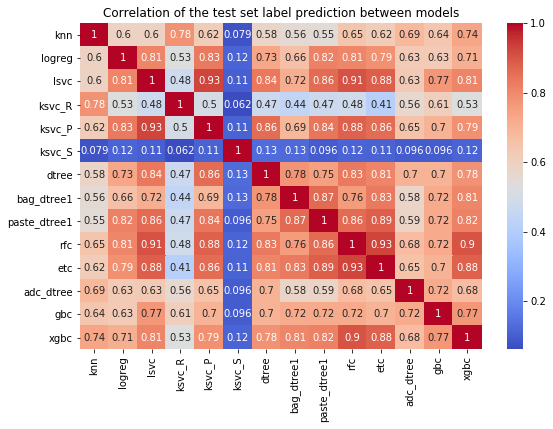

In [77]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [78]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [79]:
print("Top least Correlations")
print(get_top_abs_correlations(pred, 5))

Top least Correlations
ksvc_R  ksvc_S          0.061898
knn     ksvc_S          0.078716
ksvc_S  paste_dtree1    0.096447
        gbc             0.096447
        adc_dtree       0.096447
dtype: float64


# Stacking

In [80]:
xgbc_grid.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=2,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [81]:
# Voting top 5
from sklearn.ensemble import VotingClassifier

vclf1 = VotingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                               ('dtree', grid_dtree.best_estimator_), 
                               ('rfc', rfc_grid.best_estimator_),
                               ('etc', etc_grid.best_estimator_),
                               ('gbc', gbc_grid.best_estimator_)
                              ], )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True, )
vclf1_grid.fit(X_train,y_train)

y_pred = vclf1_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.8427251552795031
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.9001248439450686
Test score is 0.8444444444444444
Accuracy:  0.8444444444444444


In [82]:

vclf2 = VotingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                               ('dtree', grid_dtree.best_estimator_), 
                               ('rfc', rfc_grid.best_estimator_),
                               ('etc', etc_grid.best_estimator_),
                              ], )
vclf2_param = {
              'voting' : ['hard','soft'],
             }
vclf2_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True, )
vclf2_grid.fit(X_train,y_train)

y_pred = vclf2_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {vclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf2_grid.best_params_}')
print(f'Train score is {vclf2_grid.score(X_train,y_train)}')
print(f'Test score is {vclf2_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.8427251552795031
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.9001248439450686
Test score is 0.8444444444444444
Accuracy:  0.8444444444444444


In [83]:
# Voting Least Correlated
vclf3 = VotingClassifier(estimators=
                              [('ksvc_S', grid_svc_kernel_S.best_estimator_),
                               ('knn', grid_knn.best_estimator_), 
                               ('gbc', gbc_grid.best_estimator_),
                              ], )
vclf3_param = {
              'voting' : ['hard','soft'],
             }
vclf3_grid = GridSearchCV(vclf3, vclf3_param,cv=5, return_train_score=True, )
vclf3_grid.fit(X_train,y_train)

y_pred = vclf3_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {vclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_params_}')
print(f'Train score is {vclf3_grid.score(X_train,y_train)}')
print(f'Test score is {vclf3_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.8152406832298137
Best Mean Cross Validation Score is {'voting': 'soft'}
Train score is 0.9775280898876404
Test score is 0.8222222222222222
Accuracy:  0.8222222222222222


In [84]:
# Stacking top 5
from sklearn.ensemble import StackingClassifier
sclf1 = StackingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                               ('dtree', grid_dtree.best_estimator_), 
                               ('rfc', rfc_grid.best_estimator_),
                               ('etc', etc_grid.best_estimator_),
                               ('gbc', gbc_grid.best_estimator_)
                              ], final_estimator=XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic'))
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)

y_pred = sclf1_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Parameters {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.8115139751552796
Best Mean Cross Validation Score is {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Train score is 0.8838951310861424
Test score is 0.8111111111111111
Accuracy:  0.8111111111111111


In [85]:
# Stacking Least Correlated
sclf2 = StackingClassifier(estimators=
                              [('ksvc_S', grid_svc_kernel_S.best_estimator_),
                               ('knn', grid_knn.best_estimator_), 
                               ('gbc', gbc_grid.best_estimator_), 
                                                             ], 
                           final_estimator=
                           XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic'))
sclf2_param = {
              'final_estimator__max_depth' : [2,6],
              'final_estimator__n_estimators' : [50,150],
              'final_estimator__learning_rate' : [0.1,0.6,0.8],
              'final_estimator__min_child_weight' : [1,3,7],
              'final_estimator__subsample':[0.6,0.9,1],
              'stack_method':['auto', 'predict_proba']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True, )
sclf2_grid.fit(X_train,y_train)

y_pred = sclf2_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.8227562111801243
Best Mean Cross Validation Score is {'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 2, 'final_estimator__min_child_weight': 1, 'final_estimator__n_estimators': 50, 'final_estimator__subsample': 0.9, 'stack_method': 'auto'}
Train score is 0.9500624219725343
Test score is 0.8222222222222222
Accuracy:  0.8222222222222222
